# Hair Eye Color Dataset

We have a data set of recorded observations of Hair, Eye colour and gender. This is a 4x4x2 tensor.


In [11]:
show(HairEyeColor)

, , Sex = Male

       Eye
Hair    Brown Blue Hazel Green
  Black    32   11    10     3
  Brown    53   50    25    15
  Red      10   10     7     7
  Blond     3   30     5     8

, , Sex = Female

       Eye
Hair    Brown Blue Hazel Green
  Black    36    9     5     2
  Brown    66   34    29    14
  Red      16    7     7     7
  Blond     4   64     5     8



# Joint Frequencies

How often does each pair (Hair Color, Eye Color) appear in our data set?

In [3]:
(EyeHairFreq <- apply(HairEyeColor, c("Eye","Hair"), sum))

,Black,Brown,Red,Blond
Brown,68,119,26,7
Blue,20,84,17,94
Hazel,15,54,14,10
Green,5,29,14,16


Counts are hard to interpret; they muddy the patterns with numbers relevant only to the sample. Let's generalise by computing the joint probability instead. This will make it easier for us to guess what an arbitrary person's eye colour and hair colour is (pick the most likely value).

It will also allow us to guess what colour someone's hair is given their colour, and vice versa.

We can't do that without some more information though. We need the marginal distributions too.

In [12]:
round(EyeHairProp <- EyeHairFreq / sum(HairEyeColor), 2)

,Black,Brown,Red,Blond
Brown,0.11,0.20,0.04,0.01
Blue,0.03,0.14,0.03,0.16
Hazel,0.03,0.09,0.02,0.02
Green,0.01,0.05,0.02,0.03


In [13]:
(HairFreq <- apply(HairEyeColor, c("Hair"), sum))

Black Brown   Red Blond 
  108   286    71   127

In [14]:
(HairProp <- HairFreq/sum(HairFreq))

Black   Brown     Red   Blond 
0.18243 0.48311 0.11993 0.21453

That's one way to get the marginals, but there's another too. The probabilities in the joint distribution all sum to one. So if we aggregate them through other means, the sum will also be one provided we aggregate each joint distribution point once and only once.

In [18]:
apply(EyeHairProp, c("Hair"), sum)

Black   Brown     Red   Blond 
0.18243 0.48311 0.11993 0.21453

In [19]:
EyeFreq <- apply(HairEyeColor, c("Eye"), sum)
(EyeProp <- EyeFreq/sum(EyeFreq))

Brown    Blue   Hazel   Green 
0.37162 0.36318 0.15709 0.10811

In [20]:
EyeHairProp['Blue',] / EyeProp['Blue']

Black    Brown      Red    Blond 
0.093023 0.390698 0.079070 0.437209

What's the conditional probability for Brown eyes?

$p(hair = c | eyes = brown) \forall(c \in \{Black,Brown,Red,Blond\})$

In [24]:
EyeHairProp[,'Brown'] / HairProp['Brown']
EyeHairProp[,'Brown'] / sum(EyeHairProp[,'Brown'])

Brown    Blue   Hazel   Green 
0.41608 0.29371 0.18881 0.10140

Brown    Blue   Hazel   Green 
0.41608 0.29371 0.18881 0.10140

What's the conditional probability for Brown hair?

In [25]:
EyeHairProp['Brown',] / sum(EyeHairProp['Brown',])

Black    Brown      Red    Blond 
0.309091 0.540909 0.118182 0.031818

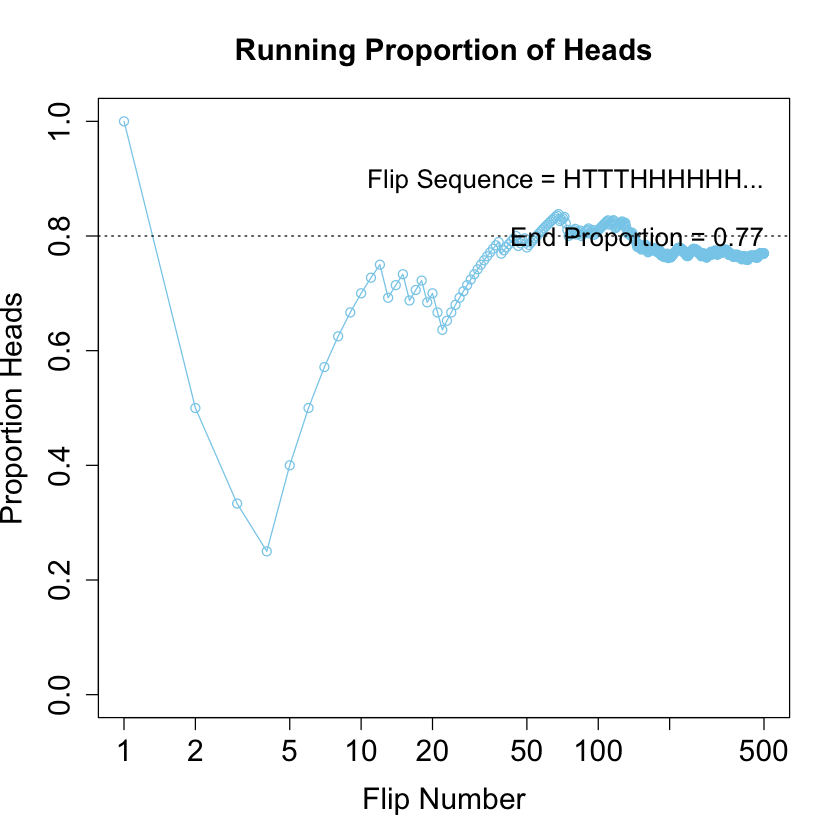

In [27]:
N = 500 # Specify the total number of flips, denoted N.
pHeads = 0.8 # Specify underlying probability of heads.
# Flip a coin N times and compute the running proportion of heads at each flip.
# Generate a random sample of N flips (heads=1, tails=0):
flipSequence = sample( x=c(0,1), prob=c(1-pHeads,pHeads), size=N, replace=TRUE )
# Compute the running proportion of heads:
r = cumsum( flipSequence ) # Cumulative sum: Number of heads at each step.
n = 1:N                    # Number of flips at each step.
runProp = r / n            # Component by component division.
# Graph the running proportion:
plot( n , runProp , type="o" , log="x" , col="skyblue" ,
      xlim=c(1,N) , ylim=c(0.0,1.0) , cex.axis=1.5 ,
      xlab="Flip Number" , ylab="Proportion Heads" , cex.lab=1.5 ,
      main="Running Proportion of Heads" , cex.main=1.5 )
# Plot a dotted horizontal reference line:
abline( h=pHeads , lty="dotted" )
# Display the beginning of the flip sequence:
flipLetters = paste( c("T","H")[flipSequence[1:10]+1] , collapse="" )
displayString = paste0( "Flip Sequence = " , flipLetters , "..." )
text( N , .9 , displayString , adj=c(1,0.5) , cex=1.3 )
# Display the relative frequency at the end of the sequence.
text( N , .8 , paste("End Proportion =",runProp[N]) , adj=c(1,0.5) , cex=1.3 )

In [28]:
nCards <- 48
nValues <- 6
nSuits <- 4
nCopies <- 2

nTens <- 1 * nSuits * nCopies
(pTen  <- nTens / nCards)

[1] 0.16667

In [29]:
nJacks <- 1 * nSuits * nCopies
(pJack <- nJacks / nCards)
(pJack + pTen)

[1] 0.16667

[1] 0.33333

In [47]:
nSpades <- nCopies * nValues
pSpade <- nSpades / nCards

nCopies / nCards

((1-pTen) * pSpade) + (pTen * (1-pSpade))
(nTens - nCopies)
(nSpades - nCopies)
16/nCards

(nSpades + nTens - nCopies)/nCards
(pTen + pSpade) - pTen * pSpade

[1] 0.041667

[1] 0.33333

[1] 6

[1] 10

[1] 0.33333

[1] 0.375

[1] 0.375

Suppose we have a biased spinner that has an output in the range $[0,1]$. The PDF isn't uniform. It's given by $p(x) = 6x(1 - x)$.

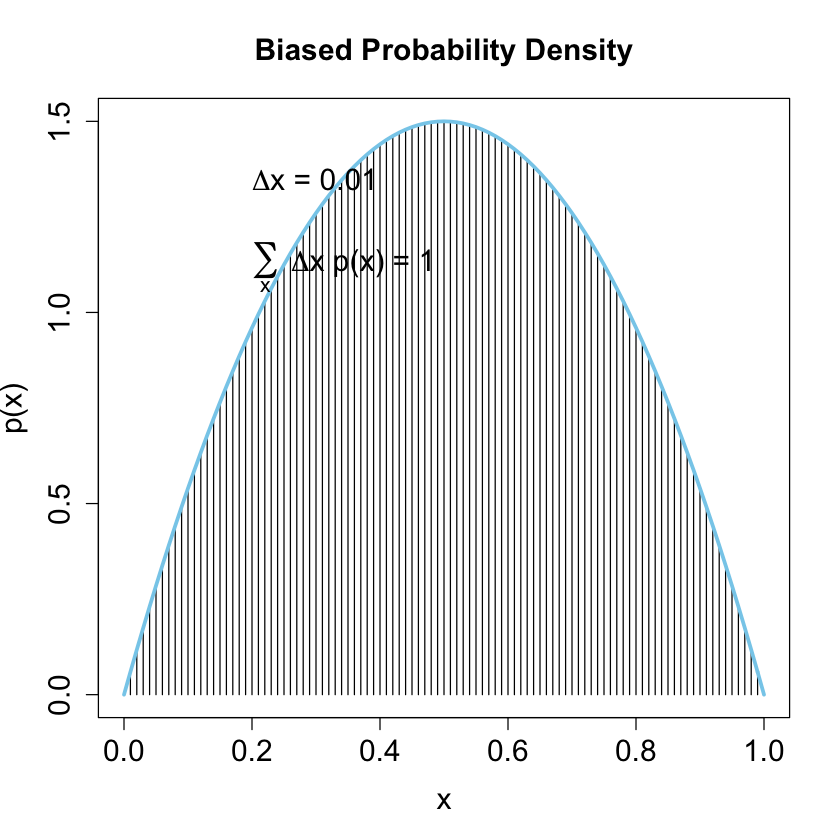

In [50]:

# Graph of normal probability density function, with comb of intervals.
xlow  = 0
xhigh = 1
dx = 0.01               # Specify interval width on x-axis
# Specify comb of points along the x axis:
x = seq( from = xlow , to = xhigh , by = dx )
# Compute y values, i.e., probability density at each value of x:
y = 6*x*(1-x)
# Plot the function. "plot" draws the intervals. "lines" draws the bell curve.

plot( x , y , type="h" , lwd=1 , cex.axis=1.5
	, xlab="x" , ylab="p(x)" , cex.lab=1.5 ,
	, main="Biased Probability Density" , cex.main=1.5 )
lines( x , y , lwd=3 ,  col="skyblue" )
# Approximate the integral as the sum of width * height for each interval.
area = sum( dx * y )
# Display info in the graph.
text( meanval+sdval , .9*max(y) , bquote( paste(Delta , "x = " ,.(dx)) )
      , adj=c(0,.5) , cex=1.5 )
text( meanval+sdval , .75*max(y) ,
      bquote(
        paste( sum(,x,) , " " , Delta , "x p(x) = " , .(signif(area,3)) )
      ) , adj=c(0,.5) , cex=1.5 )
# Save the plot to an EPS file.


What's the exact integral of our pdf?

$ f(x) = 6x(1-x) $

$ F(x) = \int{6x(1-x)}$

$ F(x) = 6\int{x(1-x)}$

$ F(x) = 6\int{x-x^2}$

$ F(x) = 6 \frac{1}{2}x^2 - \frac{1}{3}x^3 + c $

$ F(x) = 3x^2 - 2x^3 + c $

In [51]:
stopifnot(3 - 2 == 1)

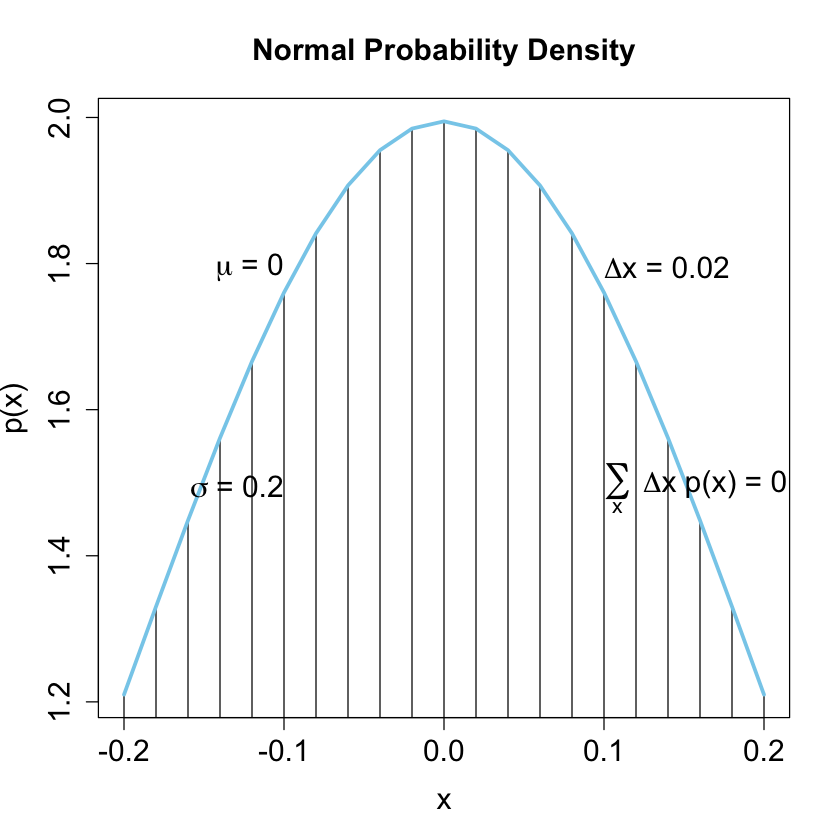

In [54]:

# Graph of normal probability density function, with comb of intervals.
meanval = 0.0               # Specify mean of distribution.
sdval = 0.2                 # Specify standard deviation of distribution.
xlow  = meanval - sdval # Specify low end of x-axis.
xhigh = meanval + sdval # Specify high end of x-axis.
dx = sdval/10               # Specify interval width on x-axis
# Specify comb of points along the x axis:
x = seq( from = xlow , to = xhigh , by = dx )
# Compute y values, i.e., probability density at each value of x:
y = ( 1/(sdval*sqrt(2*pi)) ) * exp( -.5 * ((x-meanval)/sdval)^2 )
# Plot the function. "plot" draws the intervals. "lines" draws the bell curve.
plot( x , y , type="h" , lwd=1 , cex.axis=1.5
	, xlab="x" , ylab="p(x)" , cex.lab=1.5 ,
	, main="Normal Probability Density" , cex.main=1.5 )
lines( x , y , lwd=3 ,  col="skyblue" )
# Approximate the integral as the sum of width * height for each interval.
area = sum( dx * y )
# Display info in the graph.
text( meanval-0.5*sdval , .9*max(y) , bquote( paste(mu ," = " ,.(meanval)) )
      , adj=c(1,.5) , cex=1.5 )
text( meanval-0.5*sdval , .75*max(y) , bquote( paste(sigma ," = " ,.(sdval)) )
      , adj=c(1,.5) , cex=1.5 )
text( meanval+0.5*sdval , .9*max(y) , bquote( paste(Delta , "x = " ,.(dx)) )
      , adj=c(0,.5) , cex=1.5 )
text( meanval+0.5*sdval , .75*max(y) ,
      bquote(
        paste( sum(,x,) , " " , Delta , "x p(x) = " , .(signif(area,3)) )
      ) , adj=c(0,.5) , cex=1.5 )
# Save the plot to an EPS file.


In [69]:
qnorm(c((1-0.68) /2,1-((1-0.68)/2)))

[1] -0.99446  0.99446

In [70]:
womens.heights <- c(mu = 162, sd = 15)

|              |Ice Cream | Fruit | French fries |
|--------------|----------|-------|--------------|
| 1st graders  | 0.3      |   0.6 |   0.1        | 
| 6th graders  | 0.6      |   0.3 |   0.1        | 
| 11th graders | 0.3      |   0.1 |   0.6        |

In [73]:
vals <- cbind(IceCream = c(0.3,0.6,0.3), Fruit=c(0.6,0.3,0.1), FrenchFries=c(0.1,0.1,0.6))
vals

IceCream,Fruit,FrenchFries
0.3,0.6,0.1
0.6,0.3,0.1
0.3,0.1,0.6


In [78]:
(joint_vals <- diag(c(0.2,0.2,0.6)) %*% vals)
sum(joint_vals)

IceCream,Fruit,FrenchFries
0.06,0.12,0.02
0.12,0.06,0.02
0.18,0.06,0.36


[1] 1